In [65]:
import pandas as pd
import glob
import numpy as np

In [66]:
ned=pd.read_csv('data4/simulatedHouses.csv')
ned.t=pd.to_datetime(ned.t, utc=True)
ned=ned.set_index('t')
ned.index=ned.index.tz_convert("Europe/Rome")
ned

P
t                                      
2013-01-01 01:00:00+01:00  12216.103056
2013-01-01 02:00:00+01:00  12257.781389
2013-01-01 03:00:00+01:00   9893.204444
2013-01-01 04:00:00+01:00   9808.056389
2013-01-01 05:00:00+01:00   9443.447778
...                                 ...
2013-12-30 21:00:00+01:00  18459.383611
2013-12-30 22:00:00+01:00  20743.005833
2013-12-30 23:00:00+01:00  15525.540278
2013-12-31 00:00:00+01:00  17021.233056
2013-12-31 01:00:00+01:00  12996.000000

[8737 rows x 1 columns]

In [67]:
#ned.P=ned.P/40

In [68]:
production=pd.read_csv('production4/100_m_production.csv')
production["Unnamed: 0"]=pd.read_csv('data/greedy_500_v.csv')["Unnamed: 0"].values[3:]
production=production.rename(columns={'Unnamed: 0': "date"})
production=production.set_index("date")
production.index=pd.to_datetime(production.index, utc=True)
production.index=production.index.tz_convert("Europe/Rome")
production=production.resample('1h').mean()
production

greedy_m
date                                  
2013-01-01 08:00:00+01:00  2018.728075
2013-01-01 09:00:00+01:00  2335.709134
2013-01-01 10:00:00+01:00  2678.029940
2013-01-01 11:00:00+01:00  3230.185141
2013-01-01 12:00:00+01:00  4234.882457
...                                ...
2013-12-31 12:00:00+01:00  4712.494320
2013-12-31 13:00:00+01:00  4480.054857
2013-12-31 14:00:00+01:00  3743.431588
2013-12-31 15:00:00+01:00  2716.974360
2013-12-31 16:00:00+01:00  2244.539446

[8745 rows x 1 columns]

In [69]:
merged=ned.join(production)
merged.greedy_m=merged.greedy_m.fillna(0)

In [70]:
merged.difference=merged.greedy_m-merged.P

/home/matteo/anaconda3/envs/pv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [71]:
merged[8:16]

P     greedy_m
t                                                   
2013-01-01 09:00:00+01:00  11998.002500  2335.709134
2013-01-01 10:00:00+01:00  17982.713333  2678.029940
2013-01-01 11:00:00+01:00  21312.314444  3230.185141
2013-01-01 12:00:00+01:00  16311.386944  4234.882457
2013-01-01 13:00:00+01:00  16881.469167  4055.334751
2013-01-01 14:00:00+01:00  15760.021944  3603.631180
2013-01-01 15:00:00+01:00  18346.908889  2494.314418
2013-01-01 16:00:00+01:00  17281.986944  2213.296607

In [72]:
import matplotlib.pyplot as plt

(15706.0, 16070.0)

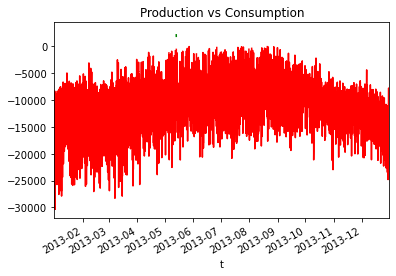

In [73]:
fig, ax = plt.subplots()
merged.difference.where(merged.difference.ge(0), np.nan).plot(kind='line',ax=ax,
                                                              color='green',
                                                              title='Production vs Consumption')
merged.difference.where(merged.difference.le(0), np.nan).plot(kind='line',ax=ax,color='red')

plt.xlim([merged.index[0],merged.index[-1]])

In [74]:
coverage=merged.sum().greedy_m*100/merged.sum().P
print(f"The pv installation is able to cover the {coverage:.1f}")

The pv installation is able to cover the 14.8


In [57]:
merged.greedy_m.sum()/173000


966.0932429675714